In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("crop_recommendation.csv")

In [5]:
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2183,93,26,27,24.592457,56.468296,7.288212,137.704405,coffee
1768,66,69,47,23.692122,93.610556,6.912300,87.533940,papaya
771,44,75,22,30.032840,64.148005,7.574562,71.210069,blackgram
2000,89,47,38,25.524690,72.248508,6.002525,151.886997,jute
1487,90,23,54,28.558525,90.457730,6.159021,27.265883,muskmelon


In [6]:
df.shape

(2200, 8)

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Nitrogen (N) Analysis:
Average Nitrogen Level: 50.551818181818184
Minimum Nitrogen Level: 0
Maximum Nitrogen Level: 140


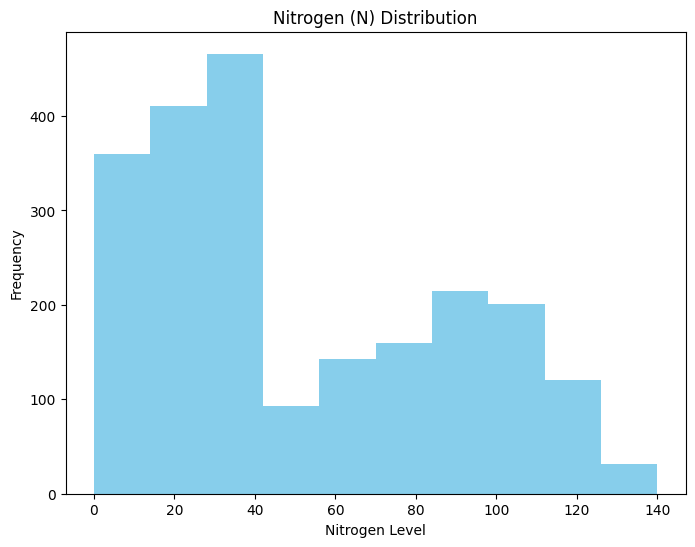


Phosphorus (P) Analysis:
Average Phosphorus Level: 53.36272727272727
Minimum Phosphorus Level: 5
Maximum Phosphorus Level: 145


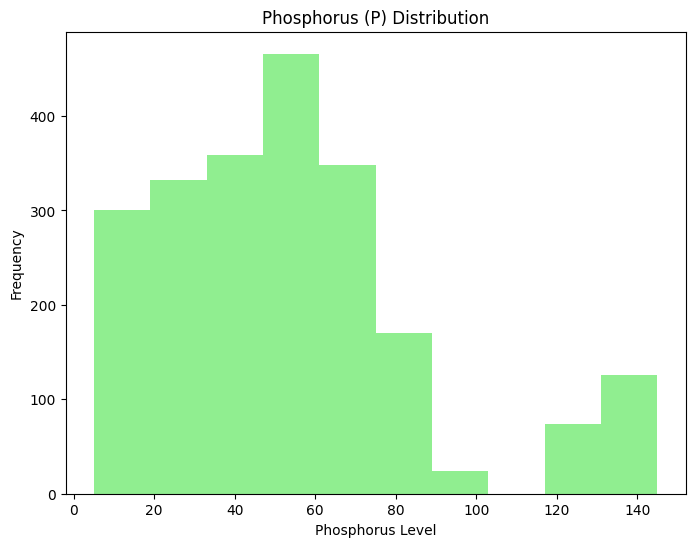


Potassium (K) Analysis:
Average Potassium Level: 48.14909090909091
Minimum Potassium Level: 5
Maximum Potassium Level: 205


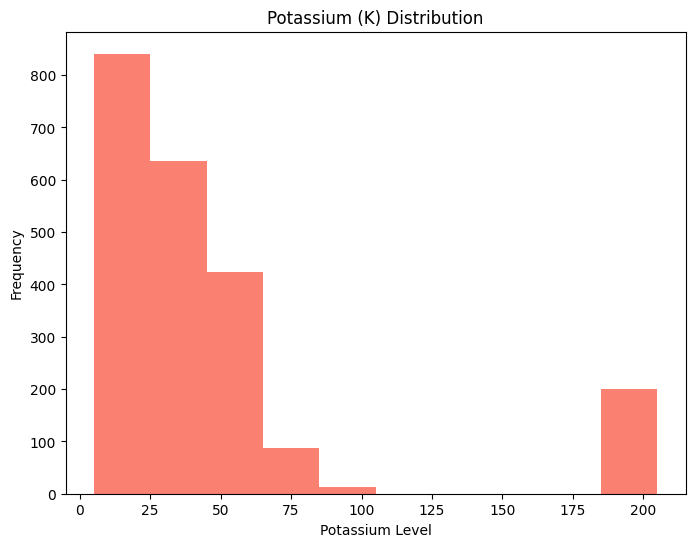


Temperature Analysis:
Average Temperature: 25.616243851779544
Minimum Temperature: 8.825674745
Maximum Temperature: 43.67549305


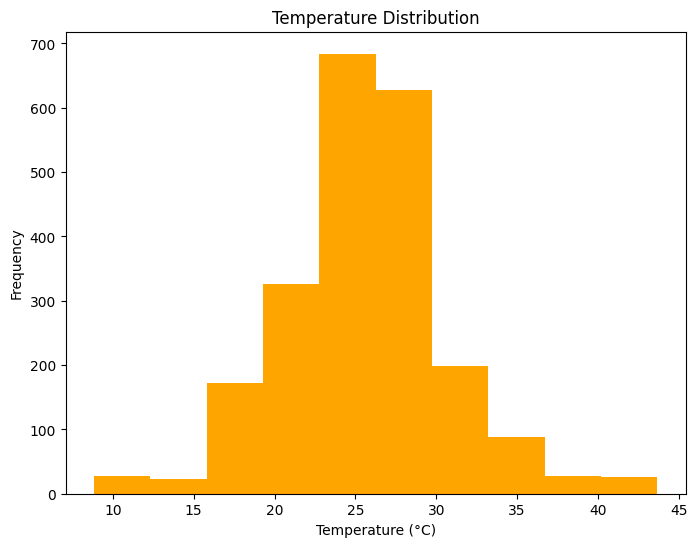


Humidity Analysis:
Average Humidity: 71.48177921778637
Minimum Humidity: 14.25803981
Maximum Humidity: 99.98187601


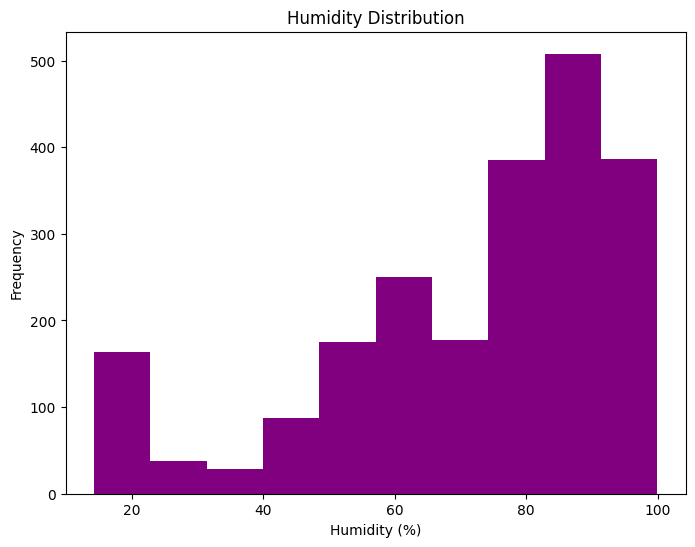


pH Analysis:
Average pH Level: 6.469480065256364
Minimum pH Level: 3.504752314
Maximum pH Level: 9.93509073


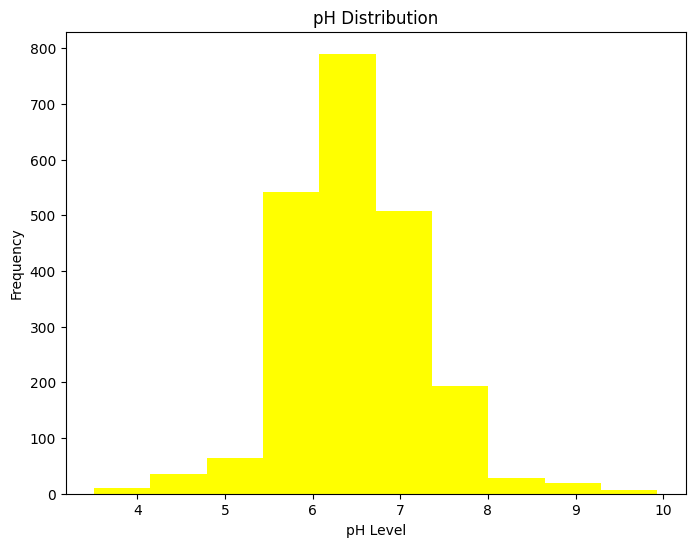


Rainfall Analysis:
Average Rainfall: 103.46365541576817
Minimum Rainfall: 20.21126747
Maximum Rainfall: 298.5601175


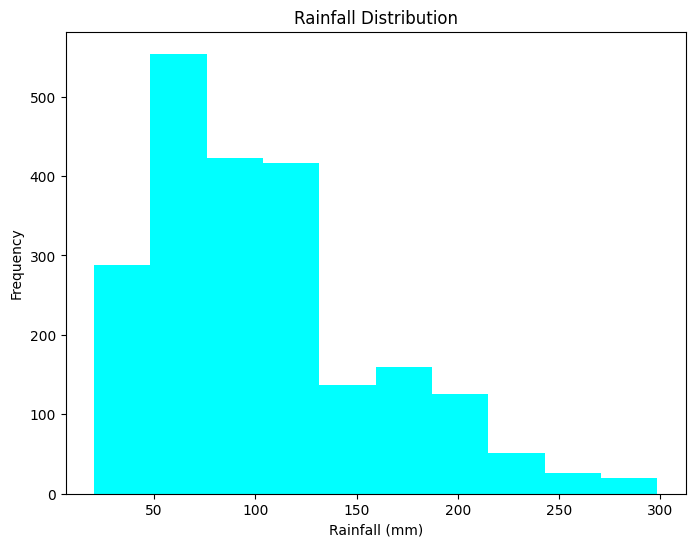

In [9]:
# Nitrogen (N)
print("Nitrogen (N) Analysis:")
print("Average Nitrogen Level:", df['N'].mean())
print("Minimum Nitrogen Level:", df['N'].min())
print("Maximum Nitrogen Level:", df['N'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['N'], bins=10, color='skyblue')
plt.title('Nitrogen (N) Distribution')
plt.xlabel('Nitrogen Level')
plt.ylabel('Frequency')
plt.show()

# Phosphorus (P)
print("\nPhosphorus (P) Analysis:")
print("Average Phosphorus Level:", df['P'].mean())
print("Minimum Phosphorus Level:", df['P'].min())
print("Maximum Phosphorus Level:", df['P'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['P'], bins=10, color='lightgreen')
plt.title('Phosphorus (P) Distribution')
plt.xlabel('Phosphorus Level')
plt.ylabel('Frequency')
plt.show()

# Potassium (K)
print("\nPotassium (K) Analysis:")
print("Average Potassium Level:", df['K'].mean())
print("Minimum Potassium Level:", df['K'].min())
print("Maximum Potassium Level:", df['K'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['K'], bins=10, color='salmon')
plt.title('Potassium (K) Distribution')
plt.xlabel('Potassium Level')
plt.ylabel('Frequency')
plt.show()

# Temperature
print("\nTemperature Analysis:")
print("Average Temperature:", df['temperature'].mean())
print("Minimum Temperature:", df['temperature'].min())
print("Maximum Temperature:", df['temperature'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['temperature'], bins=10, color='orange')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Humidity
print("\nHumidity Analysis:")
print("Average Humidity:", df['humidity'].mean())
print("Minimum Humidity:", df['humidity'].min())
print("Maximum Humidity:", df['humidity'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['humidity'], bins=10, color='purple')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

# pH
print("\npH Analysis:")
print("Average pH Level:", df['ph'].mean())
print("Minimum pH Level:", df['ph'].min())
print("Maximum pH Level:", df['ph'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['ph'], bins=10, color='yellow')
plt.title('pH Distribution')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.show()

# Rainfall
print("\nRainfall Analysis:")
print("Average Rainfall:", df['rainfall'].mean())
print("Minimum Rainfall:", df['rainfall'].min())
print("Maximum Rainfall:", df['rainfall'].max())
plt.figure(figsize=(8, 6))
plt.hist(df['rainfall'], bins=10, color='cyan')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


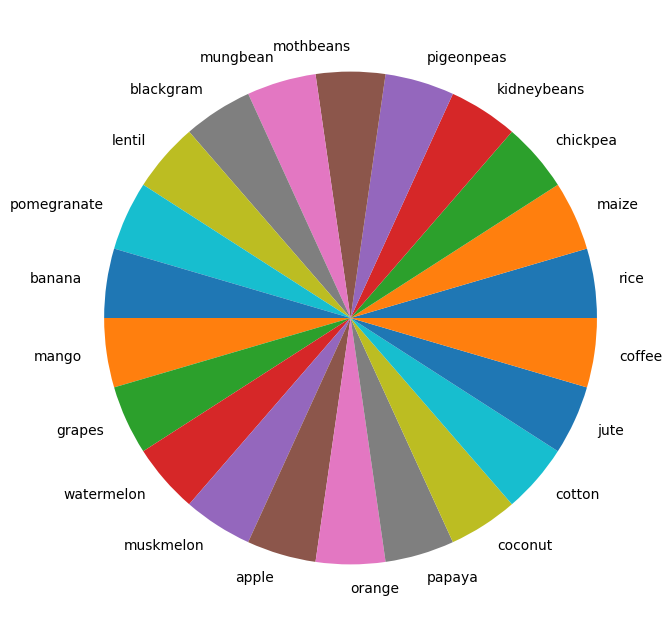

In [10]:
import matplotlib.pyplot as plt
output_counts = df["label"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(output_counts.values, labels=output_counts.index)
plt.show()

In [11]:
df.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [12]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
X = df.drop(columns='label')

In [14]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
y = df['label']

In [16]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [17]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.20, random_state=300)

## Log Reg

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [21]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

predicted = LogReg.predict(x_test)
x_lr = metrics.accuracy_score(y_test,predicted)
acc.append(x_lr)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x_lr * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 95.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       0.84      0.93      0.88        28
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        14
      cotton       1.00      0.93      0.97        15
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.95      0.90        19
 kidneybeans       0.95      1.00      0.98        21
      lentil       1.00      0.91      0.95        23
       maize       0.94      1.00      0.97        16
       mango       0.95      1.00      0.97        19
   mothbeans       0.81      0.77      0.79        22
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.0

## DT

In [22]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [23]:
dt_model  = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

predicted = dt_model.predict(x_test)
x_dt = metrics.accuracy_score(y_test,predicted)
acc.append(x_dt)
model.append('DT')
print("DT Accuracy is",x_dt * 100)
print(classification_report(y_test,predicted))

DT Accuracy is 98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        19
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.95      0.98        22
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00     

## Rf

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=300)
rf_model.fit(x_train, y_train)

pred_rf = rf_model.predict(x_test)
rf_acc = metrics.accuracy_score(y_test, pred_rf)

acc.append(rf_acc)
model.append('Random Forest')

print("Random Forest Accuracy is", rf_acc * 100)
print(classification_report(y_test, pred_rf))


Random Forest Accuracy is 99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        19
 kidneybeans       1.00      1.00      1.00        21
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.95      0.98        22
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00    

## Xg boost

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split again with encoded y
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    X, y_encoded, test_size=0.20, random_state=300
)

In [26]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=300)
xgb_model.fit(x_train1, y_train1)

pred_xgb = xgb_model.predict(x_test1)
xgb_acc = metrics.accuracy_score(y_test1, pred_xgb)

acc.append(xgb_acc)
model.append('XGBoost')

print("XGBoost Accuracy is", xgb_acc * 100)
print(classification_report(y_test1, pred_xgb))


XGBoost Accuracy is 99.0909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        22
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        21
           4       0.89      1.00      0.94        25
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        21
          10       1.00      0.96      0.98        23
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00 


Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.959091
1  Logistic Regression  0.959091
2                   DT  0.988636
3        Random Forest  0.993182
4              XGBoost  0.990909


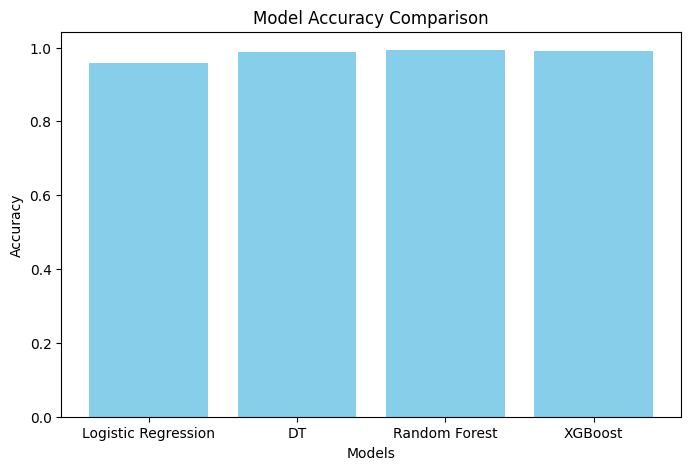

In [27]:
# Create a comparison dataframe
results = pd.DataFrame({
    'Model': model,
    'Accuracy': acc
})

print("\nModel Comparison:\n", results)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [28]:
crop_rec_filename = 'crop_rec.pickle'
with open(crop_rec_filename,'wb') as file:
    pickle.dump(rf_model, file)


In [29]:
loaded_model = pickle.load(open(crop_rec_filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9931818181818182


In [30]:
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [31]:
loaded_model.predict([[90,40, 45, 20,80, 7, 200]])

array(['rice'], dtype=object)

In [32]:
loaded_model.predict([[99, 65, 54, 27, 76, 9, 206]])

array(['rice'], dtype=object)

In [33]:
loaded_model.predict([[87, 45, 34, 17, 56, 5, 99]])

array(['maize'], dtype=object)